In [1]:
import sys, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

In [2]:
df = pd.read_csv('data/AS24_BMWi3.csv', index_col=0)

In [3]:
df.head(10)

,model,version,equipments,mileage,mmyy,power,use_type,n_owners,gear,fuel_type,price
0,BMW i3,Garanzia batterie e motore 12 mesi,['Brokar - Professional Car Brokerage - Interm...,109954.0,08/2013,75 kW (102 CV),Usato,3.0,Automatico,Elettrica,12900
1,BMW i3,I3 ELETTRICA PELLE LED NAVIGATORE BLUETOOTH,"['ESP, Cruise Control, Sistema di navigazione,...",59000.0,10/2014,75 kW (102 CV),Usato,NaN,Automatico,Elettrica,14900
2,BMW i3,60 Ah (Range Extender),"['Chiusura centralizzata, Leve al volante, Fen...",68000.0,10/2014,75 kW (102 CV),Usato,NaN,Automatico,Elettrica,15200
3,BMW i3,i3 *KM 21.000,"['Sistema di navigazione, Airbag laterali, Con...",21215.0,06/2015,75 kW (102 CV),Usato,NaN,Automatico,Elettrica,15800
4,BMW i3,NaN,"['Schermo multifunzione interamente digitale, ...",76000.0,05/2015,125 kW (170 CV),Usato,NaN,Manuale,Elettrica,16900
5,BMW i3,bmw I3 ibrida RANGE EXTENDER,"['Climatizzatore, Sedile posteriore sdoppiato,...",68000.0,10/2014,75 kW (102 CV),Usato,1.0,Automatico,Elettrica/Benzina,16900
6,BMW i3,(Range Extender),"['Chiusura centralizzata, Fendinebbia, Sensori...",50250.0,06/2014,75 kW (102 CV),Usato,1.0,Automatico,Elettrica,16900
7,BMW i3,94 Ah,['NAVI PROF/FARI LED/RETROCAMERA ECC...'],26231.0,09/2017,75 kW (102 CV),Usato,1.0,Automatico,Elettrica,19950
8,BMW i3,(Range Extender),"['Adaptive Cruise Control, Telecamera per parc...",37360.0,05/2016,125 kW (170 CV),Usato,1.0,Automatico,Elettrica/Benzina,20000
9,BMW i3,94 Ah,NaN,31000.0,02/2018,75 kW (102 CV),Usato,1.0,- (Tipo di cambio),Elettrica,21000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 0 to 245
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   model       246 non-null    object 
 1   version     236 non-null    object 
 2   equipments  17 non-null     object 
 3   mileage     202 non-null    float64
 4   mmyy        246 non-null    object 
 5   power       246 non-null    object 
 6   use_type    246 non-null    object 
 7   n_owners    95 non-null     float64
 8   gear        246 non-null    object 
 9   fuel_type   246 non-null    object 
 10  price       246 non-null    int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 23.1+ KB


In [5]:
df.describe()

,mileage,n_owners,price
count,202.000000,95.000000,246.000000
mean,29511.940594,1.094737,29431.959350
std,28898.244850,0.328559,9132.717617
min,1.000000,1.000000,12900.000000
25%,8500.000000,1.000000,22200.000000
50%,22400.000000,1.000000,28900.000000
75%,41435.750000,1.000000,35000.000000
max,150000.000000,3.000000,54120.000000


'equipments' has very few non-null values, like 'n_owners'. We neglect these features.
'version' seems to hold many different kind of models (226, to be precise). We neglect it for now.

In [6]:
df.power.value_counts()

75 kW (102 CV)     150
125 kW (170 CV)     77
135 kW (184 CV)     18
1 kW (1 CV)          1
Name: power, dtype: int64

Power has 23 different values. Let's use only kW and divide them in 3 range of power

In [7]:
df['kW'] = df['power'].apply(lambda x: int(x.split()[0]))

In [8]:
df.fuel_type.value_counts()

Elettrica            224
Elettrica/Benzina     21
Benzina                1
Name: fuel_type, dtype: int64

In [9]:
boole = df.fuel_type == 'Benzina'
df[boole]

,model,version,equipments,mileage,mmyy,power,use_type,n_owners,gear,fuel_type,price,kW
157,BMW i3,"Bmw, i3 94Ah Range Extender",NaN,9859.0,04/2018,125 kW (170 CV),Usato,NaN,Manuale,Benzina,33608,125


We find 8 cars that has "natural" in the 'version' description. They have all 'metano' as fuel_type. Therefore we can give 'metano' instead of 'Altro' 

In [10]:
#boole = df.fuel_type == 'Altro'
df.loc[157,'fuel_type'] = 'Elettrica'

In [11]:
df.use_type.unique()

array(['Usato', 'Nuovo', 'Dimostrativo', 'Aziendale', 'KM0'], dtype=object)

In [12]:
df.gear.unique()

array(['Automatico', 'Manuale', '- (Tipo di cambio)'], dtype=object)

In [13]:
df['gear'] = df['gear'].apply(lambda x: None if re.search('Tipo', x) else x)

In [14]:
df['mmyy'].unique()

array(['08/2013', '10/2014', '06/2015', '05/2015', '06/2014', '09/2017',
       '05/2016', '02/2018', '11/2017', '01/2017', '03/2019', '04/2018',
       '06/2018', '04/2019', '11/2019', '12/2019', '11/2020', '- (Anno)',
       '12/2014', '08/2015', '12/2013', '05/2014', '01/2015', '11/2014',
       '04/2014', '04/2015', '03/2016', '02/2014', '03/2015', '11/2015',
       '12/2015', '09/2015', '01/2018', '12/2017', '01/2016', '09/2016',
       '10/2015', '04/2017', '12/2016', '08/2017', '06/2019', '11/2013',
       '10/2017', '03/2017', '10/2016', '06/2017', '11/2018', '03/2018',
       '07/2017', '10/2018', '02/2017', '09/2018', '12/2018', '08/2019',
       '05/2019', '05/2018', '07/2018', '09/2019', '07/2019', '01/2019',
       '10/2019', '02/2020', '02/2019', '07/2020', '10/2020', '04/2021',
       '09/2021', '09/2020', '02/2021', '05/2021', '03/2020', '11/2021',
       '05/2020', '07/2021', '03/2021', '06/2021'], dtype=object)

In [15]:
boole = df.mmyy == '- (Anno)'
df[boole]

,model,version,equipments,mileage,mmyy,power,use_type,n_owners,gear,fuel_type,price,kW
19,BMW i3,s 120Ah,NaN,NaN,- (Anno),75 kW (102 CV),Nuovo,NaN,Automatico,Elettrica,40900,75
158,BMW i3,120 Ah,NaN,NaN,- (Anno),75 kW (102 CV),Nuovo,NaN,Automatico,Elettrica,33800,75
159,BMW i3,120 Ah,NaN,NaN,- (Anno),75 kW (102 CV),Nuovo,NaN,Automatico,Elettrica,33800,75
160,BMW i3,120 Ah,NaN,NaN,- (Anno),75 kW (102 CV),Nuovo,NaN,Automatico,Elettrica,33800,75
161,BMW i3,120 Ah,NaN,NaN,- (Anno),75 kW (102 CV),Nuovo,NaN,Automatico,Elettrica,33800,75
165,BMW i3,120 Ah Advantage *Km Zero,NaN,NaN,- (Anno),125 kW (170 CV),Nuovo,NaN,Automatico,Elettrica,34600,125
166,BMW i3,120 Ah Advantage *Km Zero,NaN,NaN,- (Anno),125 kW (170 CV),Nuovo,NaN,Automatico,Elettrica,34600,125
167,BMW i3,120 Ah Advantage *Km Zero,NaN,NaN,- (Anno),125 kW (170 CV),Nuovo,NaN,Automatico,Elettrica,34600,125
168,BMW i3,120 Ah Advantage *Pronta Consegna,NaN,NaN,- (Anno),125 kW (170 CV),Nuovo,NaN,Automatico,Elettrica,34600,125
169,BMW i3,120 Ah Advantage *Km Zero,NaN,NaN,- (Anno),125 kW (170 CV),Nuovo,NaN,Automatico,Elettrica,34600,125


In [16]:
df.loc[boole,'mmyy'] = '11/2021'

In [17]:
df['mmyy'] = df['mmyy'].apply(pd.to_datetime)
df = df.sort_values(by=['mmyy'], ascending=True)

In [18]:
now = pd.to_datetime('11/2021')

In [19]:
df['age']  = (now - df.mmyy) / np.timedelta64(1, 'Y')

<IPython.core.display.Javascript object>


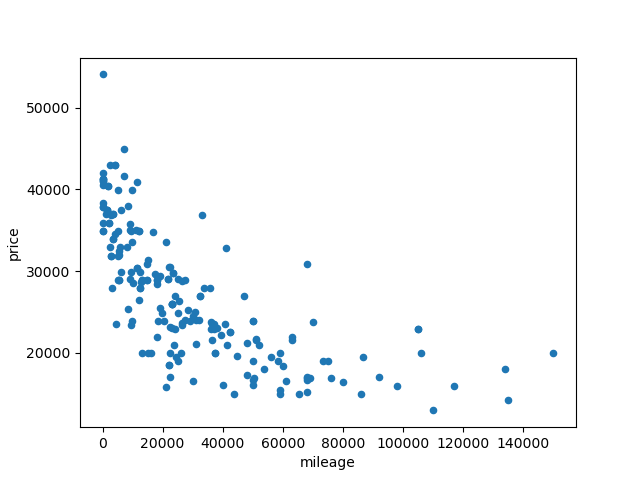

In [20]:
df.plot(x='mileage', y='price', kind='scatter')

<IPython.core.display.Javascript object>


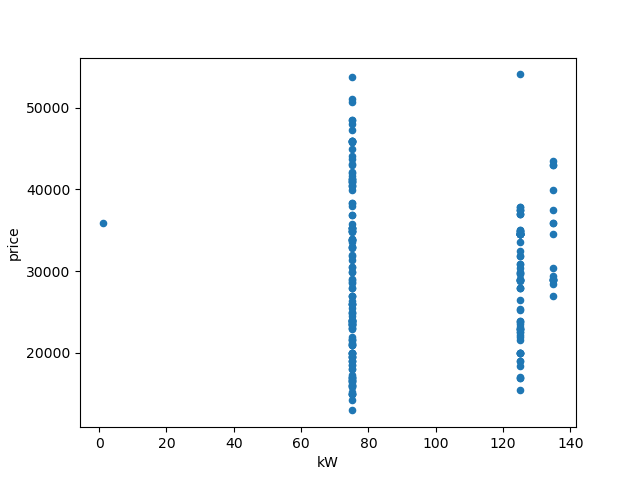

In [21]:
df.plot(x='kW', y='price', kind='scatter')

<IPython.core.display.Javascript object>


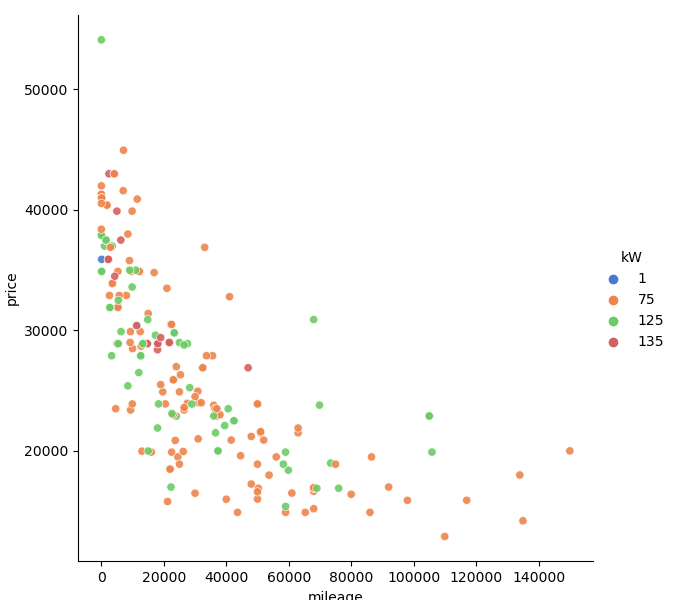

In [22]:
sns.relplot(x="mileage", y="price", hue="kW",# size='mileage',
            sizes=(40, 400), alpha=.9, palette="muted",
            height=6, data=df)

<IPython.core.display.Javascript object>


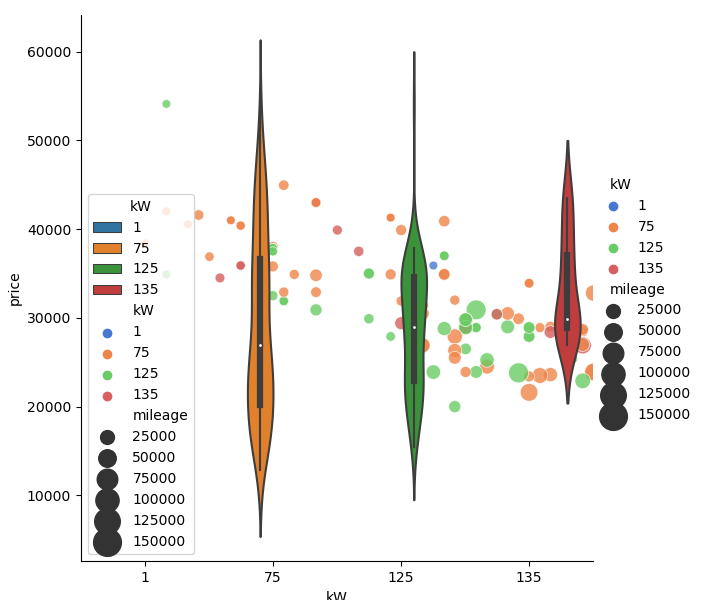

In [23]:
sns.relplot(x="age", y="price", hue='kW', size='mileage',
            sizes=(40, 400), alpha=.8, palette="muted",
            height=6, data=df)

In [24]:
sns.violinplot(x='kW', y='price', hue='kW', data=df)